<a href="https://colab.research.google.com/github/sharinair14/Python-programs/blob/master/Iris_dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [9]:
iris=load_iris()

In [10]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df['target']=iris.target

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
df0=df[df['target']==0]

In [38]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [39]:
df1=df[df['target']==1]

In [40]:
df2=df[df['target']==2]

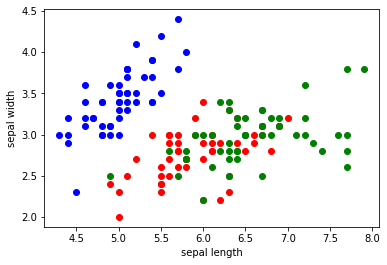

In [47]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green')

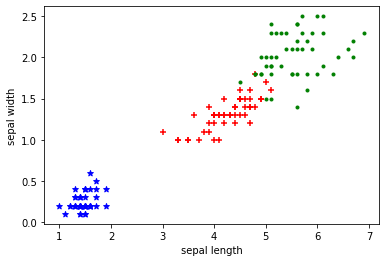

In [48]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',marker='.')

In [56]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop(['target','flower_name'],axis=1)

In [52]:
y = df['target']

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [83]:
len(X_train)

105

In [84]:
len(X_test)

45

In [53]:
from sklearn.svm import SVC

In [146]:
s = SVC(gamma=0.10)

In [147]:
s.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
pred=s.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score

In [149]:
print('Accuracy is',accuracy_score(y_test,pred))

Accuracy is 0.9777777777777777
